### Ćwiczenie 5 - Ex. 5


1.  Wyświetlanie obrazu wczytanego z pliku o podanej nazwie
    <br>Display the image loaded from a file with the specified name

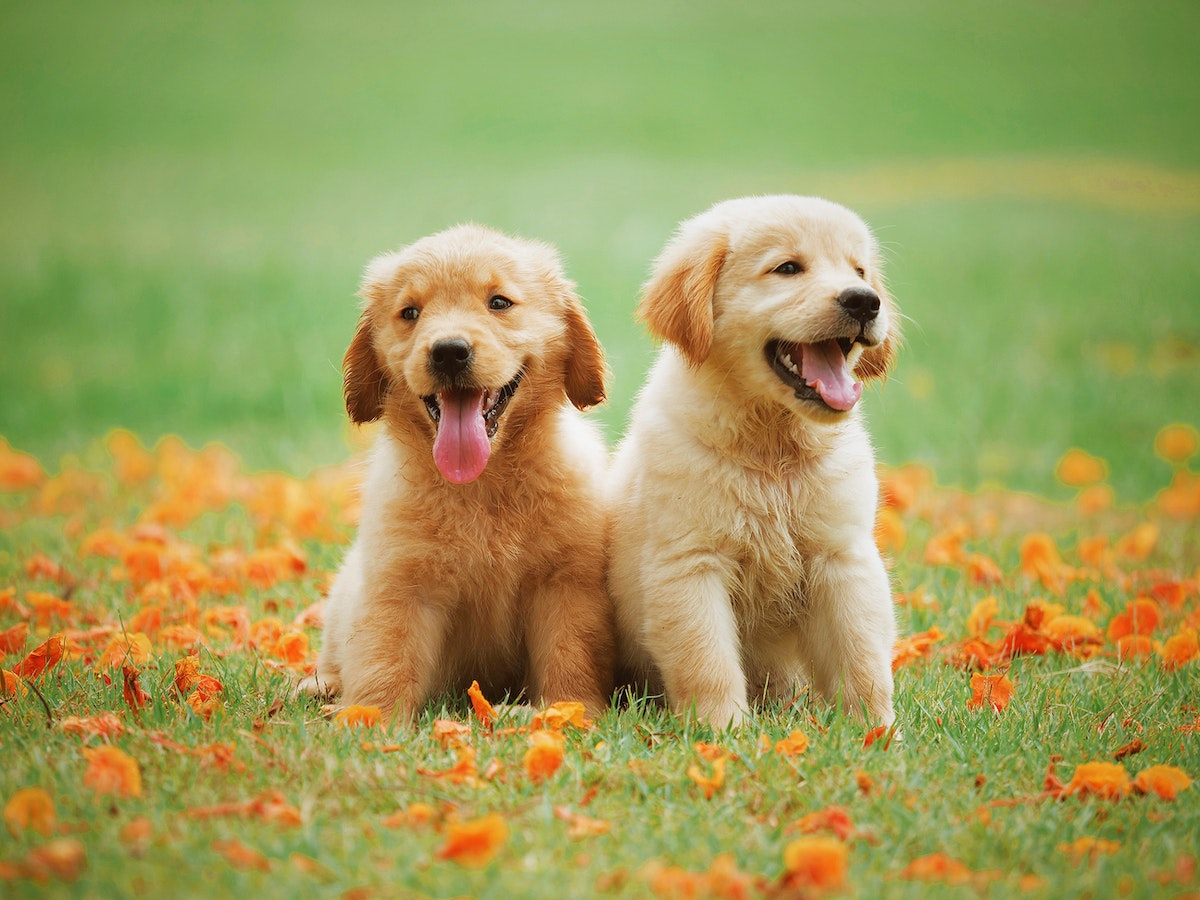

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import random

name = "dogs.jpg"
img = Image.open(name)

#plt.imshow(img)
img

2. Sporządzenie wykresów zmian poziomu szarości wzdłuż wybranej linii poziomej
lub pionowej o zadanej współrzędnej
<br>Plotting of grey level changes along a selected horizontal
or vertical line of a given coordinate

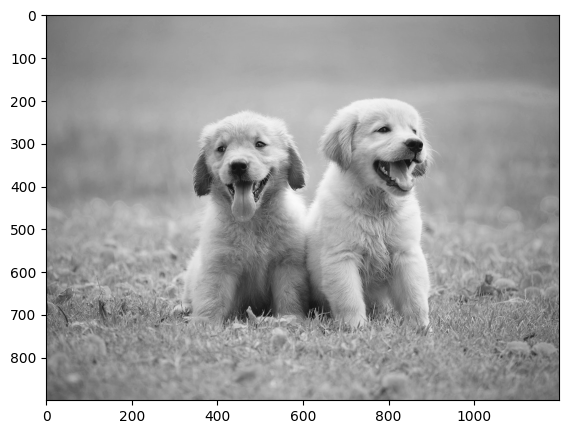

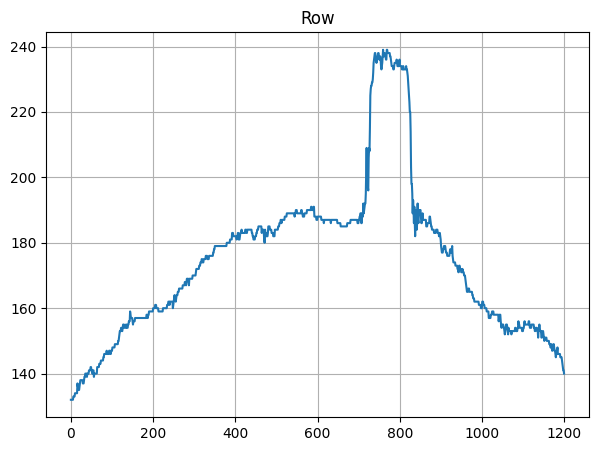

In [3]:
gray = Image.open(name).convert("L")
row = 200

plt.figure(figsize = [7, 5])
plt.imshow(gray, cmap='gray')

plt.figure(figsize = [7, 5])
gray_array = np.asarray(gray)
plt.title('Row')
plt.grid(axis="both")
plt.plot(np.arange(0, len(gray_array[row, :]), 1), gray_array[row, :])
plt.show()


3. Wybór podobrazu (prostokątnego obszaru) o podanych współrzędnych oraz jego
zapis do pliku o zadanej nazwie.
<br>Selection of a sub-image (rectangular area) with given coordinates and its
saving to a file with the given name.

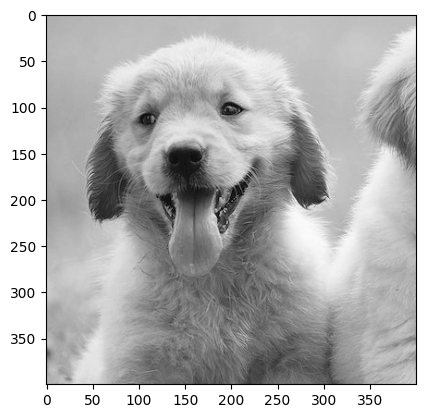

In [4]:
gray_cropped = gray_array[200:600, 300:700]
plt.imshow(gray_cropped, cmap='gray')
plt.savefig("cropped_dogs.jpg")

### Ćwiczenie 6 - Ex. 6


1. Mnożenie obrazu przez stałą c
<br>Multiplying the image by the constant c

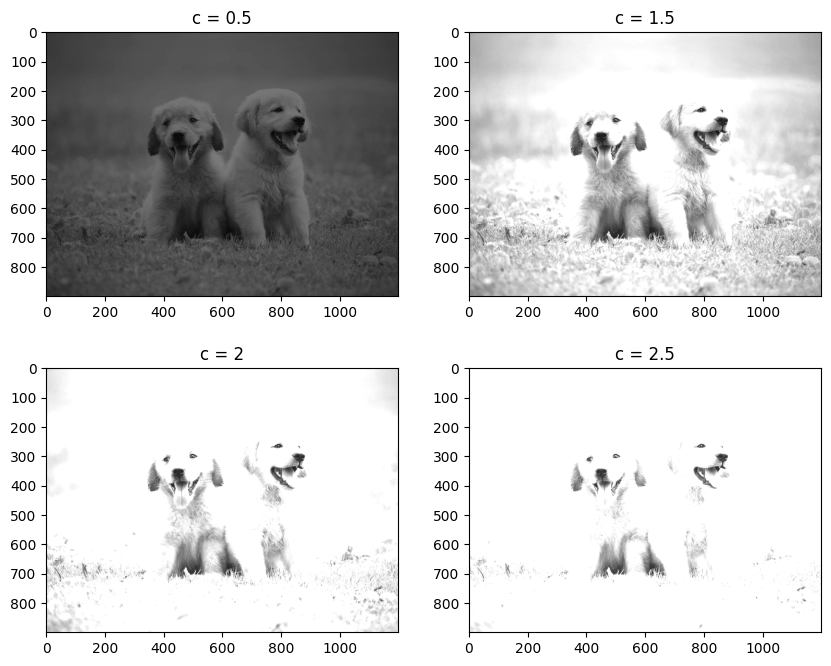

In [5]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title('c = 0.5')
plt.imshow(cv.multiply(gray_array,0.5), cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,2)
plt.title('c = 1.5')
plt.imshow(cv.multiply(gray_array,1.5), cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,3)
plt.title('c = 2')
plt.imshow(cv.multiply(gray_array,2), cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,4)
plt.title('c = 2.5')
plt.imshow(cv.multiply(gray_array,2.5), cmap='gray', vmin=0, vmax=255)

2. Zmiana dynamiki skali szarości (kontrastu)
<br>
Changing the grey scale dynamic range (contrast)

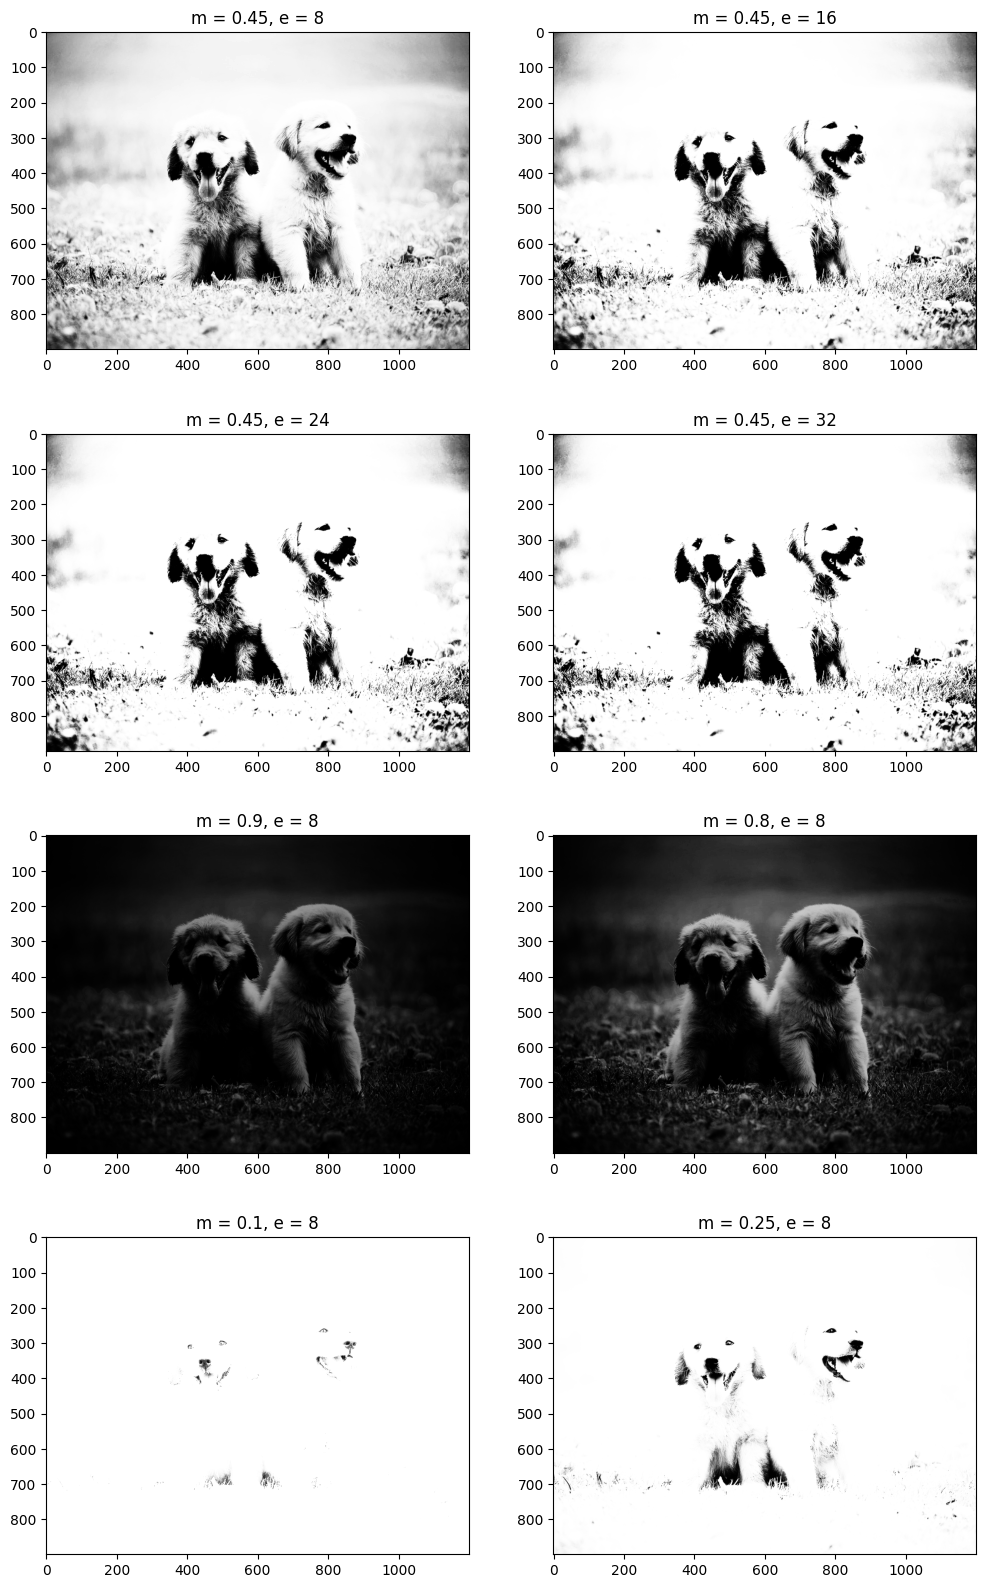

In [6]:
plt.figure(figsize=(12,20))
contrast_array = gray_array / 255

plt.subplot(4,2,1)
plt.title('m = 0.45, e = 8')
contrast = (255.0/(1+np.power((0.45/(contrast_array)),8)))
plt.imshow(contrast, cmap='gray', vmin=0, vmax=255)

plt.subplot(4,2,2)
plt.title('m = 0.45, e = 16')
contrast = (255.0/(1+np.power((0.45/(contrast_array)),16)))
plt.imshow(contrast, cmap='gray', vmin=0, vmax=255)

plt.subplot(4,2,3)
plt.title('m = 0.45, e = 24')
contrast = (255.0/(1+np.power((0.45/(contrast_array)),24)))
plt.imshow(contrast, cmap='gray', vmin=0, vmax=255)

plt.subplot(4,2,4)
plt.title('m = 0.45, e = 32')
contrast = (255.0/(1+np.power((0.45/(contrast_array)),32)))
plt.imshow(contrast, cmap='gray', vmin=0, vmax=255)

plt.subplot(4,2,5)
plt.title('m = 0.9, e = 8')
contrast = (255.0/(1+np.power((0.9/(contrast_array)),8)))
plt.imshow(contrast, cmap='gray', vmin=0, vmax=255)

plt.subplot(4,2,6)
plt.title('m = 0.8, e = 8')
contrast = (255.0/(1+np.power((0.8/(contrast_array)),8)))
plt.imshow(contrast, cmap='gray', vmin=0, vmax=255)

plt.subplot(4,2,7)
plt.title('m = 0.1, e = 8')
contrast = (255.0/(1+np.power((0.1/(contrast_array)),8)))
plt.imshow(contrast, cmap='gray', vmin=0, vmax=255)

plt.subplot(4,2,8)
plt.title('m = 0.25, e = 8')
contrast = (255.0/(1+np.power((0.25/(contrast_array)),8)))
plt.imshow(contrast, cmap='gray', vmin=0, vmax=255)

3. Korekcja gamma
<br> Gamma correction

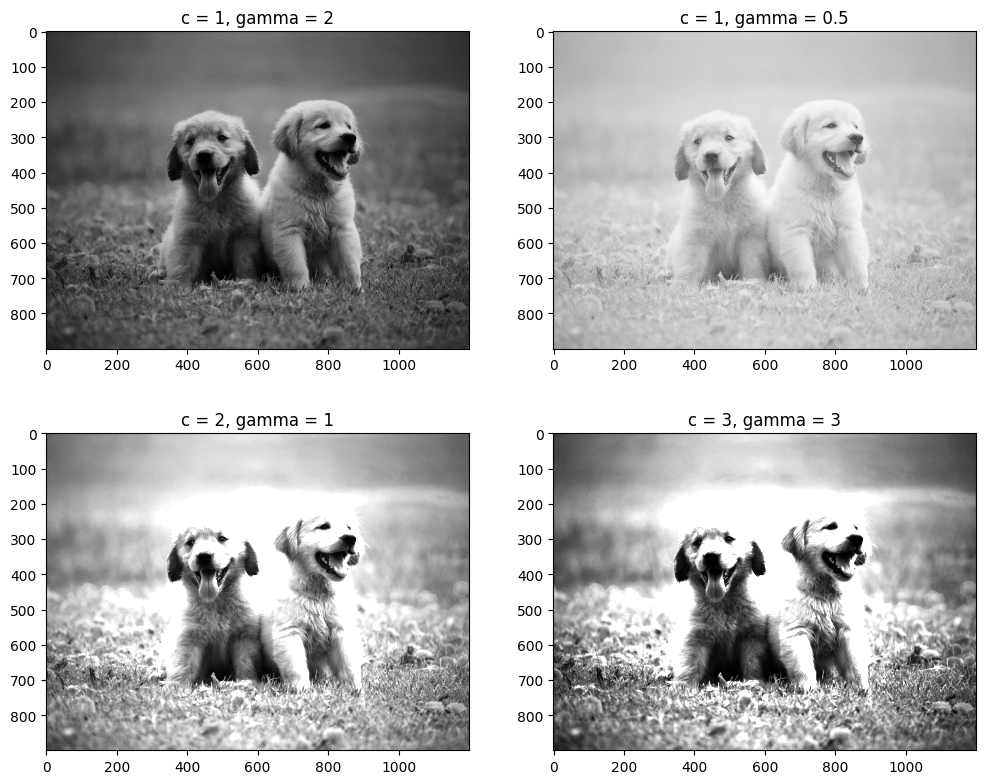

In [7]:
plt.figure(figsize=(12,20))
gamma_array = gray_array / 255

plt.subplot(4,2,1)
plt.title('c = 1, gamma = 2')
gamma = 255*1*np.power(gamma_array, 2)
plt.imshow(gamma, cmap='gray', vmin=0, vmax=255)

plt.subplot(4,2,2)
plt.title('c = 1, gamma = 0.5')
gamma = 255*1*np.power(gamma_array, 0.5)
plt.imshow(gamma, cmap='gray', vmin=0, vmax=255)

plt.subplot(4,2,3)
plt.title('c = 2, gamma = 1')
gamma = 255*2*np.power(gamma_array, 2)
plt.imshow(gamma, cmap='gray', vmin=0, vmax=255)

plt.subplot(4,2,4)
plt.title('c = 3, gamma = 3')
gamma = 255*3*np.power(gamma_array, 3)
plt.imshow(gamma, cmap='gray', vmin=0, vmax=255)

### Ćwiczenie 7 - Ex. 7


1. Wypróbowanie działania wyrównywania histogramu na przykładowych obrazach. By zaobserwować skuteczność procedury, poddaj wyrównywaniu obrazy zbyt ciemne i zbyt jasne. Narysować histogramy obrazów przed i po wyrównaniu.
<br> Trying out the operation of histogram equalisation on example images. To see the effectiveness of the procedure, equalize images that are too dark and too light. Draw the histograms of the images before and after equalisation.

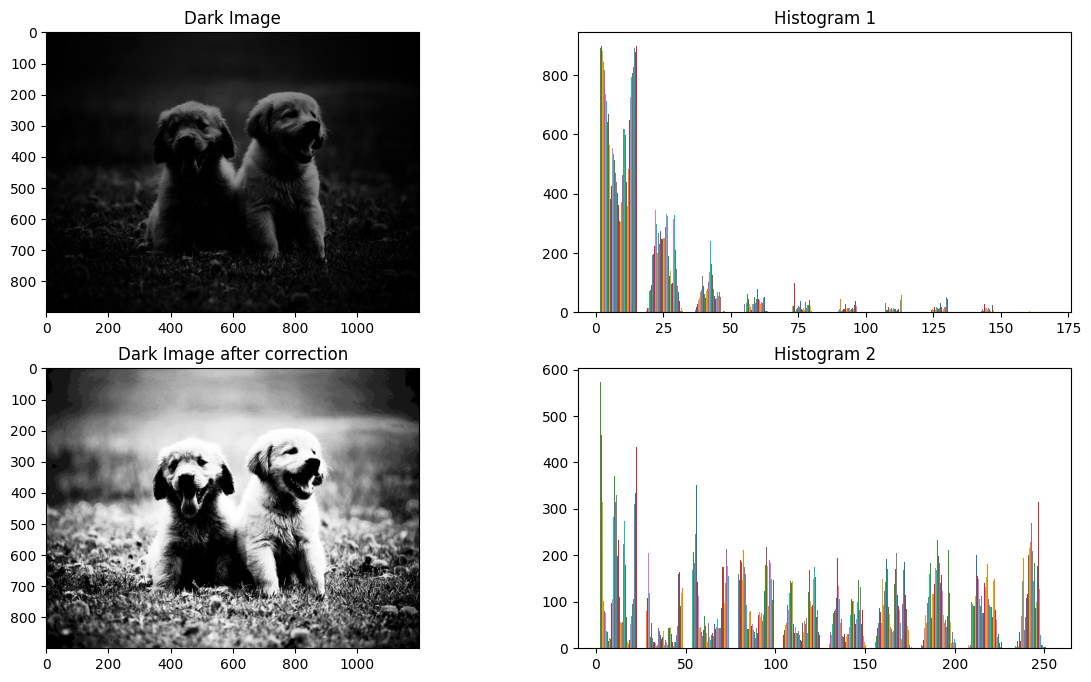

In [8]:
# create a dark image by increasing the contrast
dark_image = (255.0/(1+np.power((0.9/(gray_array / 255)),8)))

plt.figure(figsize=(14, 8))

plt.subplot(2,2,1)
plt.title('Dark Image')
plt.imshow(dark_image, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,2)
plt.title('Histogram 1')
plt.hist(dark_image)

correction = cv.equalizeHist(np.uint8(dark_image))
plt.subplot(2,2,3)
plt.title('Dark Image after correction')
plt.imshow(correction, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,4)
plt.title('Histogram 2')
plt.hist(correction)
plt.show()

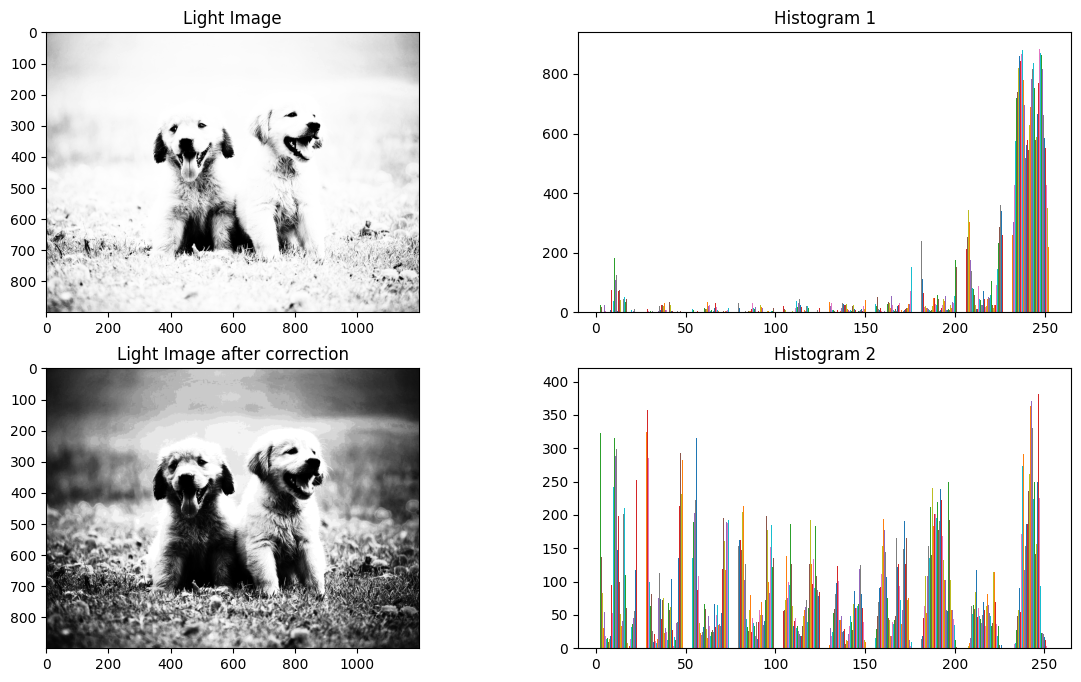

In [9]:
# create a light image by decreasing the contrast
light_image = (255.0/(1+np.power((0.4/(gray_array / 255)),8)))

plt.figure(figsize=(14, 8))

plt.subplot(2,2,1)
plt.title('Light Image')
plt.imshow(light_image, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,2)
plt.title('Histogram 1')
plt.hist(light_image)

correction = cv.equalizeHist(np.uint8(light_image))
plt.subplot(2,2,3)
plt.title('Light Image after correction')
plt.imshow(correction, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,4)
plt.title('Histogram 2')
plt.hist(correction)
plt.show()


### Ćwiczenie 8 - Ex. 8

1. Zbadaj skuteczność redukcji szumu typu „sól i pieprz” za pomocą liniowego filtra uśredniającego z kwadratową maską, rozpoczynając od maski rozmiaru 3 × 3
<br>
Investigate the effectiveness of 'salt and pepper' noise reduction using linear averaging filter with a square mask, starting with a mask of size 3 × 3

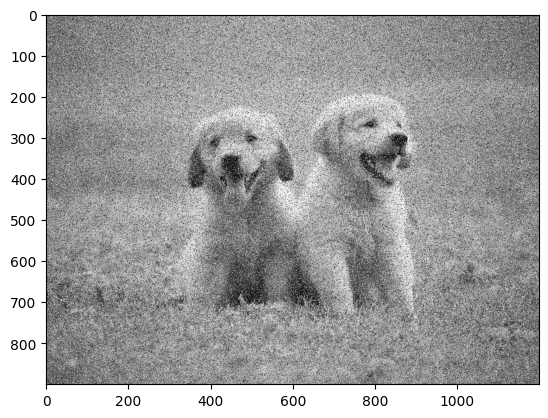

In [10]:
# https://stackoverflow.com/questions/22937589/how-to-add-noise-gaussian-salt-and-pepper-etc-to-image-in-python-with-opencv
# creating an image with noise

def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

noise_img = sp_noise(gray_array, 0.1)
plt.imshow(noise_img, cmap='gray', vmin=0, vmax=255)

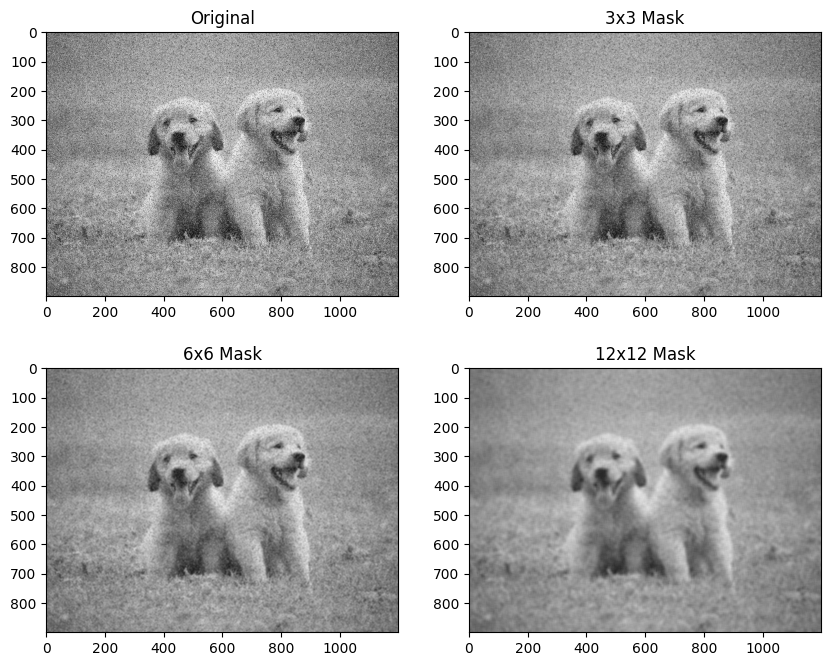

In [11]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title('Original')
plt.imshow(noise_img, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,2)
plt.title('3x3 Mask')
plt.imshow(cv.blur(noise_img,(3,3)), cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,3)
plt.title('6x6 Mask')
plt.imshow(cv.blur(noise_img,(6,6)), cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,4)
plt.title('12x12 Mask')
plt.imshow(cv.blur(noise_img,(12,12)), cmap='gray', vmin=0, vmax=255)

2. Zbadaj skuteczność redukcji szumu typu „sól i pieprz” za pomocą nieliniowego filtra medianowego.
<br>
Investigate the effectiveness of salt-and-pepper noise reduction using a non-linear median filter.

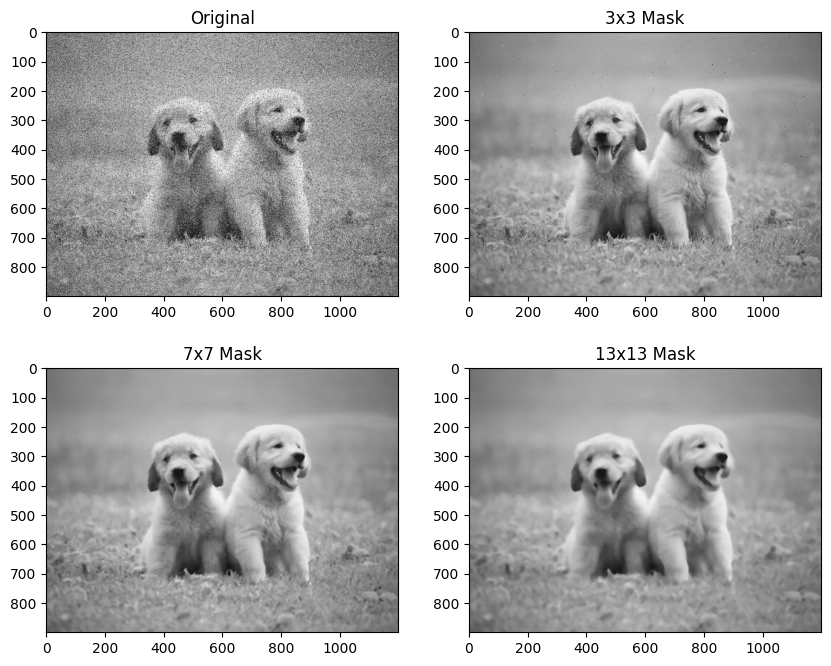

In [12]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title('Original')
plt.imshow(noise_img, cmap='gray', vmin=0, vmax=255)

# Masks in medianBlur should be odd

plt.subplot(2,2,2)
plt.title('3x3 Mask')
plt.imshow(cv.medianBlur(noise_img,3), cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,3)
plt.title('7x7 Mask')
plt.imshow(cv.medianBlur(noise_img,7), cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,4)
plt.title('13x13 Mask')
plt.imshow(cv.medianBlur(noise_img,13), cmap='gray', vmin=0, vmax=255)

### Ćwiczenie  - Ex. 9

1. Zastosuj filtry górnoprzepustowe do wykrywania krawędzi na przykładowych obrazach. Użyj filtra z maską Sobela do wykrywania krawędzi. Zaobserwuj działanie Laplasjanu do wyostrzania szczegółów.
<br>
Use high-pass filters for edge detection in the example images. Use the Sobel mask filter for edge detection. Observe the effect of Laplasjan for sharpening details.

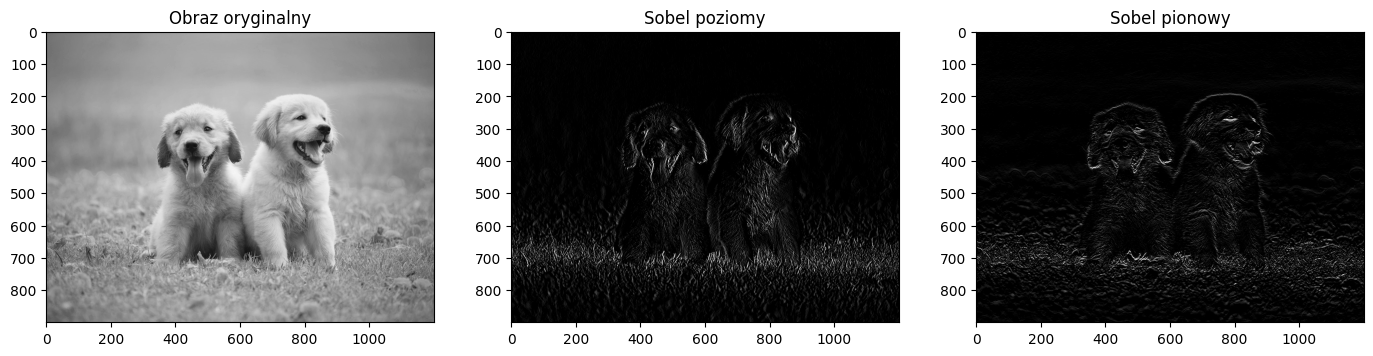

In [18]:
# Sobel
img_sobel = np.asarray(gray)

plt.figure(figsize=(17,12))

plt.subplot(1,3,1)
plt.title('Orignal')
plt.imshow(img_sobel, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
plt.title('Horizontal Sobel')
plt.imshow(cv.Sobel(img_sobel, -1, 1, 0, ksize = 3), cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,3)
plt.title('Vertical Sobel')
plt.imshow(cv.Sobel(img_sobel, -1, 0, 1, ksize = 3), cmap='gray', vmin=0, vmax=255)

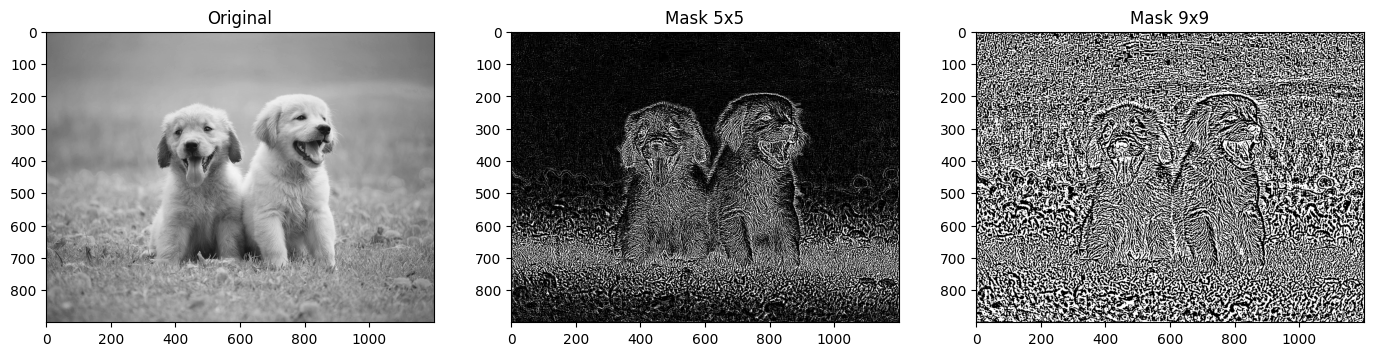

In [26]:
# Laplasjan
plt.figure(figsize=(17,12))

plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(img_sobel, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
plt.title('Mask 5x5')
plt.imshow(cv.Laplacian(img_sobel, -1, ksize = 5), cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,3)
plt.title('Mask 9x9')
plt.imshow(cv.Laplacian(img_sobel, -1, ksize = 9), cmap='gray', vmin=0, vmax=255)